Circuito RLC Série


<IPython.core.display.Javascript object>


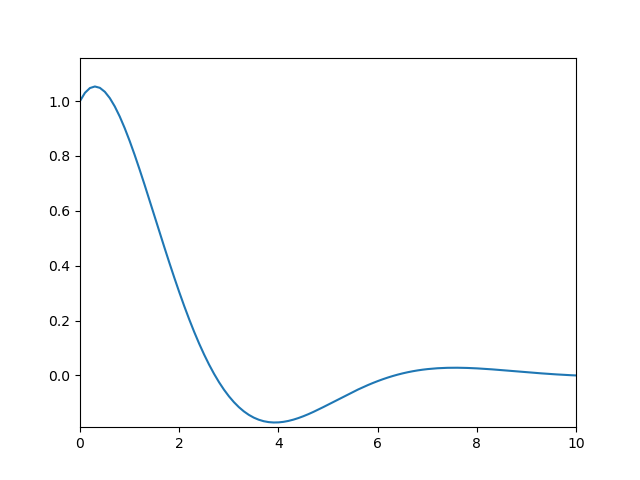

interactive(children=(FloatText(value=1.0, description='R', step=0.1), FloatText(value=1.0, description='L', s…

In [20]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *   


print('Circuito RLC Série')

#display(R,L,C,A,B)



tstop=100
x = np.linspace(0,tstop,1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def pre_out(r0,l0,c0):
    if resposta in ['sup']:
        p1 = -alpha+np.sqrt(np.power(alpha,2)-np.power(w0,2))
        p2 = -alpha-np.sqrt(np.power(alpha,2)-np.power(w0,2))
        tstop=np.max(5*(-1/p1),5*(-1/p2))
    elif resposta in ['cri']:
        tstop=5*(1/alpha)
    elif resposta in ['sub']:
        wd = np.sqrt(np.power(w0,2)-np.power(alpha,2))
        tstop=5*(1/alpha)
    return tstop
    


def saida(r0,l0,c0,a0,b0,x0):
    alpha = r0/(2*l0)
    w0 = 1/np.sqrt(l0*c0)
    
    if np.power(alpha,2)>np.power(w0,2):
        resposta = 'Superamortecida'
    elif np.power(alpha,2)==np.power(w0,2):
        resposta ='Criticamente Amortecida'
    else:
        resposta ='Subamortecida'
        
    if resposta in ['Superamortecida']:
        p1 = -alpha+np.sqrt(np.power(alpha,2)-np.power(w0,2))
        p2 = -alpha-np.sqrt(np.power(alpha,2)-np.power(w0,2))
        fx=a0*np.exp(p1*x)+b0*np.exp(p2*x)+x0
        taxis = 5*(-1/p1)
        solucao = 'A solução é da forma x(t)='+str(round(a0,2))+'exp('+str(round(p1,2))+'t)+'+str(round(b0,2))+'exp('+str(round(p2,2))+'t)'
    elif resposta in ['Criticamente Amortecida']:
        p = -alpha
        fx = a0*np.exp(p*x)+b0*x*np.exp(p*x)+x0
        taxis=5*(-1/p)
        solucao = 'A solução é da forma x(t)='+str(round(a0,2))+'exp('+str(round(p,2))+'t)+'+str(round(b0,2))+'t.exp('+str(round(p,2))+'t)'
    elif resposta in ['Subamortecida']:
        wd = np.sqrt(np.power(w0,2)-np.power(alpha,2))
        fx = np.exp(-alpha*x)*(a0*np.cos(wd*x)+b0*np.sin(wd*x))+x0
        solucao = 'A solução é da forma x(t)=exp(-'+str(round(alpha,2))+'t)['+str(round(a0,2))+'cos('+str(round(wd,2))+'t)+'+str(b0)+'sen('+str(round(wd,2))+'t)]'
        taxis = (5*(1./alpha))
    return resposta,fx,solucao,taxis


def update(R=1,L=1,C=1,A=1,B=1,X=1):
    resposta,fx,solucao,taxis=saida(R,L,C,A,B,X)    
    print('A resposta é '+resposta+'.')
    print(solucao)
    line.set_ydata(fx)
    fig.canvas.draw()
    ax.set(xlim=(0, taxis), ylim=(np.min(fx)-0.1*np.abs(min(fx)),np.max(fx)+0.1*np.abs(max(fx))))
    
interact(update, R=FloatText(min=0.1, max=100, value=1,step=0.1),
        L=FloatText(min=0.001, max=100, value=1,step=0.1),
        C=FloatText(min=0.001, max=100, value=1,step=0.1),
        A=FloatText(min=-100, max=100, value=1,step=0.1),
        B=FloatText(min=-100, max=100, value=1,step=0.1),
        X=FloatText(min=-100,max=100, value=0,step=0.1));

In [11]:
print(taxis)

NameError: name 'taxis' is not defined